In [4]:
import torch
from PIL import Image
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
from unet import UNet

import os

In [18]:


def single_image_inference(image_pth, model_pth, mask_pth, device):
    model = UNet(in_channels=1, num_classes=1).to(device)
    model.load_state_dict(torch.load(model_pth, map_location=torch.device(device)))
    model.eval()

    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor()
    ])

    img = transform(Image.open(image_pth)).float().to(device)
    img = img.unsqueeze(0)

    with torch.no_grad():
        # pred_mask = torch.sigmoid(model(img))
        # print(pred_mask)
        pred_mask = model(img)  # (1, 1, 128, 128)
       
       
     
    img = img.squeeze(0).cpu().permute(1, 2, 0)
    pred_mask = pred_mask.squeeze(0).cpu().permute(1, 2, 0)
    pred_mask[pred_mask< 0] = 0
    pred_mask[pred_mask > 0] = 1
    

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    axes[0].imshow(img, cmap="gray")
    axes[0].set_title("Input Image")

    axes[1].imshow(pred_mask, cmap="gray")
    axes[1].set_title("Predicted Mask")

    axes[2].imshow(Image.open(mask_pth), cmap="gray")
    axes[2].set_title("Ground Truth Mask")

    plt.show()
    return pred_mask.numpy()
    

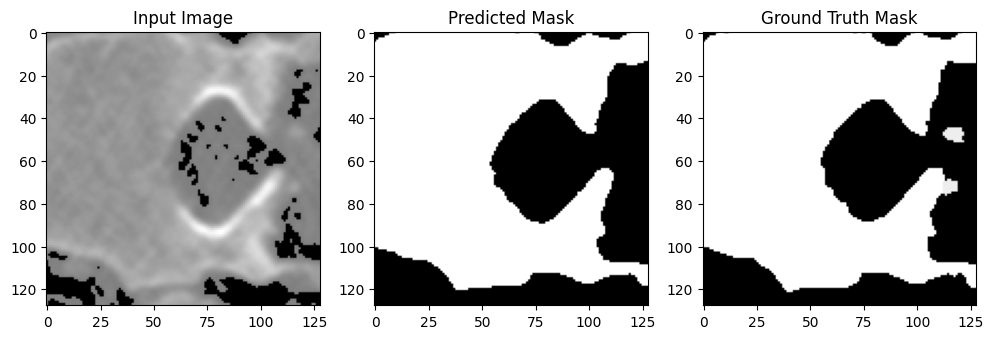

In [19]:
if __name__ == "__main__":
    SINGLE_IMG_PATH = "../3d Images/SpinePatchesDataset/data/data_patch_101215.png"
    MODEL_PATH = "./models/FullDataModelUnet1.pth"
    MASK_PATH = "../3d Images/SpinePatchesDataset/label/label_patch_101215.png"
    SAVE_FOLDER = "./saved_images/"
    device = "cuda" if torch.cuda.is_available() else "cpu"

    pred_mask=single_image_inference(SINGLE_IMG_PATH, MODEL_PATH, MASK_PATH, device)

In [20]:
import tqdm 
import cv2 as cv
import numpy as np
from sklearn.metrics import accuracy_score, f1_score,jaccard_score,precision_score,recall_score,roc_auc_score

In [21]:
true_mask=cv.imread(MASK_PATH,cv.IMREAD_GRAYSCALE)


In [22]:
print(pred_mask)

[[[0.]
  [0.]
  [0.]
  ...
  [1.]
  [1.]
  [1.]]

 [[0.]
  [0.]
  [0.]
  ...
  [1.]
  [1.]
  [1.]]

 [[0.]
  [0.]
  [0.]
  ...
  [1.]
  [1.]
  [1.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


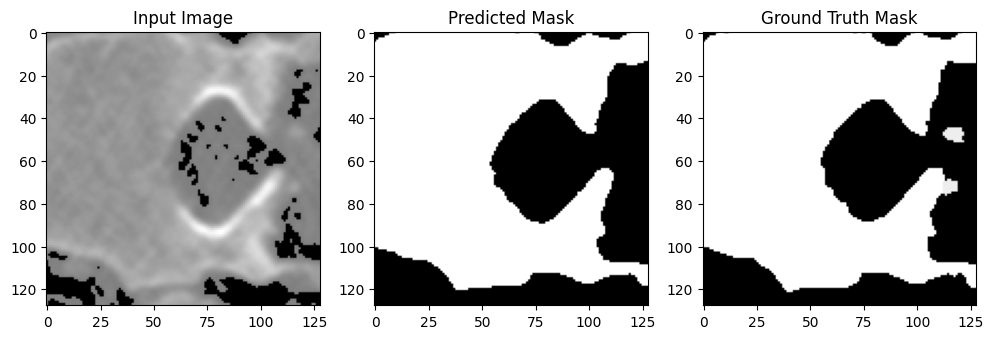

Jaccard Score: 0.971351752271463
Recall Score: 0.9740609892153217
F1 Score: 0.9854677138691624
Accuracy: 0.98114013671875


In [23]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# Perform inference
pred_mask = single_image_inference(SINGLE_IMG_PATH, MODEL_PATH, MASK_PATH, device)
pred_mask=pred_mask.flatten()
# Load and preprocess the ground truth mask
true_mask = cv.imread(MASK_PATH, cv.IMREAD_GRAYSCALE)
true_mask = true_mask / 255.0
true_mask = (true_mask > 0.5).astype(np.int32)
true_mask = true_mask.flatten()
acc_value=accuracy_score(true_mask, pred_mask)
f1_value = f1_score(true_mask, pred_mask, labels=[0, 1], average="binary")
jacc_value=jaccard_score(true_mask, pred_mask, labels=[0, 1], average="binary")
rec_value=recall_score(true_mask, pred_mask, labels=[0, 1], average="binary")
print("Jaccard Score:", jacc_value)
print("Recall Score:", rec_value)
print("F1 Score:", f1_value)
print("Accuracy:", acc_value)






In [131]:
import os
import tqdm
data_dir="../3d Images/niiTestMask/data"
label_path="../3d Images/niiTestMask/label"

data_paths=os.listdir(data_dir)
# label_path=os.listdir(label_path)

for data_path in tqdm(data_paths):
    





['data_patch_0.png',
 'data_patch_1.png',
 'data_patch_10.png',
 'data_patch_100.png',
 'data_patch_1000.png',
 'data_patch_1001.png',
 'data_patch_1002.png',
 'data_patch_1003.png',
 'data_patch_1004.png',
 'data_patch_1005.png',
 'data_patch_1006.png',
 'data_patch_1007.png',
 'data_patch_1008.png',
 'data_patch_1009.png',
 'data_patch_101.png',
 'data_patch_1010.png',
 'data_patch_1011.png',
 'data_patch_1012.png',
 'data_patch_1013.png',
 'data_patch_1014.png',
 'data_patch_1015.png',
 'data_patch_1016.png',
 'data_patch_1017.png',
 'data_patch_1018.png',
 'data_patch_1019.png',
 'data_patch_102.png',
 'data_patch_1020.png',
 'data_patch_1021.png',
 'data_patch_1022.png',
 'data_patch_1023.png',
 'data_patch_1024.png',
 'data_patch_1025.png',
 'data_patch_1026.png',
 'data_patch_1027.png',
 'data_patch_1028.png',
 'data_patch_1029.png',
 'data_patch_103.png',
 'data_patch_1030.png',
 'data_patch_1031.png',
 'data_patch_1032.png',
 'data_patch_1033.png',
 'data_patch_1034.png',
 'da

In [6]:
import os
from PIL import Image
import torch
import torchvision.transforms as transforms
from concurrent.futures import ThreadPoolExecutor
import cv2
import numpy as np
from torchvision import models


def single_image_inference(image_path, model, device):
    # Perform inference on a single image
    transform = transforms.Compose([
        transforms.Resize((128, 128)),
        transforms.ToTensor()
    ])

    img = transform(Image.open(image_path)).float().to(device)
    img = img.unsqueeze(0)

    with torch.no_grad():
        pred_mask = model(img)

    pred_mask = pred_mask.squeeze(0).cpu().permute(1, 2, 0)
    pred_mask[pred_mask < 0] = 0
    pred_mask[pred_mask > 0] = 1

    return pred_mask.numpy()

def process_image(args):
    # Unpack arguments
    image_path, model, output_dir, device = args

    # Process a single image and save the result using cv2
    pred_mask = single_image_inference(image_path, model, device)

    # Convert the floating-point mask to uint8 format (0 or 255)
    pred_mask_uint8 = (pred_mask * 255).astype(np.uint8)

    # Construct the output path
    output_path = os.path.join(output_dir, os.path.basename(image_path))

    # Save the predicted mask using cv2
    cv2.imwrite(output_path, pred_mask_uint8)

def batch_inference(input_dir, output_dir, model, device):
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Use a ThreadPoolExecutor for parallel processing
    with ThreadPoolExecutor() as executor:
        # Process each image in parallel
        args = [(os.path.join(input_dir, file_name), model, output_dir, device) for file_name in os.listdir(input_dir) if file_name.endswith(('.png', '.jpg', '.jpeg'))]
        executor.map(process_image, args)



# Example usage
input_directory = '../3d Images/niiTestMask/data'  # Replace with the actual input directory path
output_directory = '../3d Images/niiTestMask/p_labels'  # Replace with the desired output directory path
model_path = './models/FullDataModelUnet1.pth'  # Replace with the actual model path
device = "cuda" if torch.cuda.is_available() else "cpu"  # Replace with 'cpu' if using CPU

# Load the model outside the functions to avoid redundant loading
model = UNet(in_channels=1, num_classes=1).to(device)
model.load_state_dict(torch.load(model_path, map_location=torch.device(device)))
model.eval()

batch_inference(input_directory, output_directory, model, device)


In [33]:
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, jaccard_score, recall_score, precision_score, confusion_matrix
from tqdm import tqdm

def calculate_metrics(true_mask, pred_mask):
    # Confusion Matrix
    cm = confusion_matrix(true_mask, pred_mask, labels=[0, 1])

    # True Negative Rate (Specificity)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0.0

    # Dice coefficient
    dice = (2 * tp) / (2 * tp + fp + fn) if (2 * tp + fp + fn) != 0 else 0.0

    # Sensitivity (Recall)
    sensitivity = recall_score(true_mask, pred_mask, labels=[0, 1], average="binary", zero_division=1)

    return specificity, dice, sensitivity


def evaluate_directory(true_masks_dir, pred_masks_dir):
    specificity_scores = []
    dice_scores = []
    sensitivity_scores = []

    true_labels = os.listdir(true_masks_dir)
    pred_labels = os.listdir(pred_masks_dir)

    for pred_y, true_y in tqdm(zip(pred_labels, true_labels), total=len(true_labels), desc="Processing"):
        pred_mask_path = os.path.join(pred_masks_dir, pred_y)
        true_mask_path = os.path.join(true_masks_dir, true_y)

        # Load the precomputed predicted mask
        pred_mask = cv2.imread(pred_mask_path, cv2.IMREAD_GRAYSCALE) / 255.0
        pred_mask = (pred_mask > 0.5).astype(np.int32)
        pred_mask = pred_mask.flatten()

        # Load and preprocess the ground truth mask
        true_mask = cv2.imread(true_mask_path, cv2.IMREAD_GRAYSCALE) / 255.0
        true_mask = (true_mask > 0.5).astype(np.int32)
        true_mask = true_mask.flatten()

        # Calculate and store scores
        specificity, dice, sensitivity = calculate_metrics(true_mask, pred_mask)
        specificity_scores.append(specificity)
        dice_scores.append(dice)
        sensitivity_scores.append(sensitivity)

    # Calculate mean scores
    mean_specificity = np.mean(specificity_scores)
    mean_dice = np.mean(dice_scores)
    mean_sensitivity = np.mean(sensitivity_scores)

    # Print mean scores
    print("Mean Specificity:", mean_specificity)
    print("Mean Dice Coefficient:", mean_dice)
    print("Mean Sensitivity:", mean_sensitivity)

# Example usage
true_mask_dir = '../3d Images/niiTestMask/label'  # Replace with the actual input directory path
pred_mask_dir = '../3d Images/niiTestMask/p_labels'  # Replace with the actual output directory path

# Perform evaluation on the directory
evaluate_directory(true_mask_dir, pred_mask_dir)


Processing: 100%|██████████| 8720/8720 [00:41<00:00, 209.61it/s]

Mean Specificity: 0.9971841601089774
Mean Dice Coefficient: 0.13444374766927428
Mean Sensitivity: 0.9666783308972553
